In [37]:
import xarray as xr
import matplotlib.pyplot as plt
import os 
import numpy as np

import cartopy
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.patches import Rectangle

In [ ]:
obs = xr.open_dataset()

In [59]:
# nanoose stn obs data
folder_path = "C:\\temp\\nanoose_prepped\\CTD"  

i = 0
datasets = []

for file_name in os.listdir(folder_path):
    if file_name.endswith(".nc"):
        
        full_file_path = folder_path + "\\" + file_name
        obs = xr.open_dataset(full_file_path)
        obs_coord = obs.get(['latitude','longitude'])
        
        datasets.append(obs_coord)
        
all_obs_coords = xr.concat(datasets, dim='single')

In [ ]:
# model meshmask

with nc.Dataset(f) as ncid:
    tmaskutil = ncid.variables["tmaskutil"][0,:, :].filled()
    latt = ncid.variables["nav_lat"][:, :].filled()
    lont = ncid.variables["nav_lon"][:, :].filled()
    e1t = ncid.variables["e1t"][0,:, :].filled()
    e2t = ncid.variables["e2t"][0,:, :].filled()



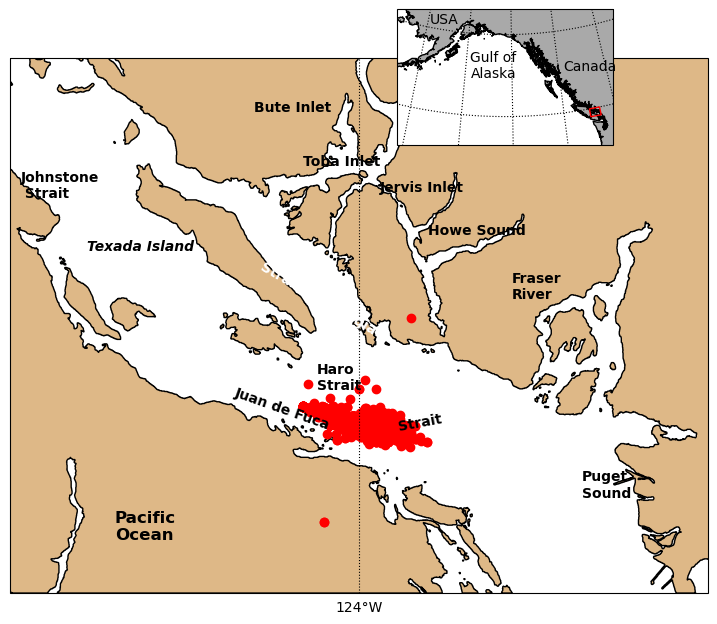

In [48]:
subdomain = [114, 397, 334, 897]
fig = plt.figure(figsize=(9, 7))
gs = plt.GridSpec(1, 1)#, width_ratios=[1.8, 1], wspace=0.13)

# Map Left
xlim, ylim = [-125, -123], [49, 50]
ax = fig.add_subplot(gs[0], projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#full (low for easy render)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

ax.text(0.15, 0.1, 'Pacific\nOcean', weight='bold', fontsize = 12, transform=ax.transAxes)
ax.text(0.32, 0.307, 'Juan de Fuca', weight='bold', transform=ax.transAxes, rotation=-19.5)
ax.text(0.555, 0.305, 'Strait', weight='bold', transform=ax.transAxes, rotation=10.5)
ax.text(0.82, 0.18, 'Puget\nSound', weight='bold', transform=ax.transAxes)

ax.text(0.355, 0.4851, 'Strait of Georgia', weight='bold', transform=ax.transAxes, rotation=-30, color='w')
#ax.text(0.010, 0.755, 'Johnstone', weight='bold', transform=ax.transAxes, rotation=-20)
ax.text(0.015, 0.740, 'Johnstone \n Strait ', weight='bold', transform=ax.transAxes, rotation=-0)
#ax.text(0.16, 0.675, 'Strait', weight='bold', transform=ax.transAxes, rotation=-60)

ax.text(0.44, 0.38, 'Haro\nStrait', weight='bold', transform=ax.transAxes)


ax.text(0.72, 0.55, 'Fraser\nRiver', weight='bold', transform=ax.transAxes)
ax.text(0.35, 0.9, 'Bute Inlet', weight='bold', transform=ax.transAxes)
ax.text(0.42, 0.80, 'Toba Inlet', weight='bold', transform=ax.transAxes)
ax.text(0.53, 0.75, 'Jervis Inlet', weight='bold', transform=ax.transAxes)
ax.text(0.60, 0.67, 'Howe Sound', weight='bold', transform=ax.transAxes)
ax.text(0.11, 0.64, 'Texada Island', weight='bold',fontstyle="italic", 
        color = 'k', fontsize = 10, transform=ax.transAxes)

# obs
ax.plot(all_obs_coords['longitude'][:], all_obs_coords['latitude'][:], 'ro', transform=crs.PlateCarree())
# model grid
ax.plot(lont, latt, transform=crs.PlateCarree())

#Map Inset
xmap, ymap = [-161, -122], [45, 62]
ax2 = fig.add_axes([0.555, 0.75, 0.24, 0.2], projection=crs.LambertConformal(np.mean(xmap), np.mean(ymap)))
ax2.set_extent(xmap + ymap)
ax2.add_feature(feature.GSHHSFeature('low', edgecolor='k', facecolor='darkgray'))
ax2.add_patch(Rectangle(
    (xlim[0], ylim[0]), int(np.diff(xlim)), int(np.diff(ylim)),
    transform=crs.PlateCarree(), fill=False, edgecolor='r', zorder=10,
))



ax2.text(0.34, 0.5, 'Gulf of\nAlaska', transform=ax2.transAxes)
ax2.text(0.77, 0.55, 'Canada', transform=ax2.transAxes)
ax2.text(0.15, 0.9, 'USA', transform=ax2.transAxes)



xticks, yticks = list(range(-170, -100, 10)), list(range(40, 80, 10))
ax2.gridlines(linestyle=":", color='k', xlocs=xticks, ylocs=yticks)
ax2.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax2.yaxis.set_major_formatter(LATITUDE_FORMATTER)
fig.canvas.draw()

#ax.set_title('Nanoose CTD observation location (red) \n on standard Salish Sea map',zorder = 100)

#lct.lambert_xticks(ax, xticks)
#lct.lambert_yticks(ax, yticks)

# # Colorbar
# cax = fig.add_axes([0.15, 0.06, 0.73, 0.025])
# fig.colorbar(c, cax=cax, orientation='horizontal', label='surface diatom concentration (mmol N m$^{-3}$)')

# fig.savefig('./paper_figs/MF01-domain.jpg', bbox_inches='tight', dpi = 300)

In [58]:
all_obs_coords['longitude'][:].min()

<xarray.DataArray 'longitude' ()>
array(-124.15917206)